<a href="https://colab.research.google.com/github/arexdevson/Analises-Python/blob/main/KPrototype_PowerB_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas:



In [ ]:
#kmodes = biblioteca similar ao k-means para executar clusterização de variaveis categóricas e numéricas
!pip install kmodes

In [ ]:
#Bibliotecas

import warnings
warnings.filterwarnings("ignore")

#tratamento e visualização dos dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kprototypes import KPrototypes
import numpy as np
from google.colab import files
from sklearn.decomposition import PCA

#Validação de dados:
from sklearn.metrics import silhouette_score


#tratamento dos dados - ML
from sklearn.preprocessing import MinMaxScaler



#Clusterização

#Importação dos Dados

In [ ]:
#Carregando o dataset do kaggle aqui
files.upload()


{}

In [ ]:
#Executando no google colab em suas pastas com os arquivos será gerado o arquivo -> botão direito nele -> pegue o caminho e input na variavel abaixo
df = pd.read_excel('/content/Bank Customer Churn Prediction.xlsx')

##Preparação dos dados

In [ ]:
df = df.loc[df['churn']==1]
df.reset_index(inplace=True)
df.drop(columns=['index'],inplace=True)
df

,customer_id,credit_score,country,gender,age,tenure(year),balance,products_number,credit_card,active_member,estimated_salary,churn
0,15565706,612,Spain,Male,35,1,0.00,1,1,1,83256.26,1
1,15566030,497,Germany,Male,41,5,80542.81,1,0,0,88729.22,1
2,15566211,616,Germany,Female,41,1,103560.57,1,1,0,236.45,1
3,15566251,618,France,Female,37,5,96652.86,1,1,0,98686.40,1
4,15566253,580,Germany,Male,44,9,143391.07,1,0,0,146891.07,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2032,15815271,755,Germany,Male,43,6,165048.50,3,1,0,16929.41,1
2033,15815316,644,France,Male,50,9,76817.00,4,1,0,196371.13,1
2034,15815490,670,Germany,Male,40,2,164948.98,3,0,0,177028.00,1
2035,15815626,640,France,Male,63,2,68432.45,2,1,1,112503.24,1


In [ ]:
df.drop(columns=['customer_id','churn'],inplace=True)
df.head()


,credit_score,country,gender,age,tenure(year),balance,products_number,credit_card,active_member,estimated_salary
0,612,Spain,Male,35,1,0.00,1,1,1,83256.26
1,497,Germany,Male,41,5,80542.81,1,0,0,88729.22
2,616,Germany,Female,41,1,103560.57,1,1,0,236.45
3,618,France,Female,37,5,96652.86,1,1,0,98686.40
4,580,Germany,Male,44,9,143391.07,1,0,0,146891.07


In [ ]:
colunas_para_escalar = ['credit_score', 'balance','estimated_salary']

scaler = MinMaxScaler()

df[colunas_para_escalar] = scaler.fit_transform(df[colunas_para_escalar])


In [ ]:
# Preciso definir colunas numéricas e categoricas
numerical_columns = ['credit_score', 'age','tenure(year)','balance','products_number','credit_card','active_member','estimated_salary']
categorical_columns = ['country', 'gender']




In [ ]:
categorical_indexes = []

for c in categorical_columns:
    categorical_indexes.append(df.columns.get_loc(c))

categorical_indexes

[1, 2]

##Validação N° Clusters (PCA / ELBOW CURVE)

Text(0, 0.5, 'Cost')

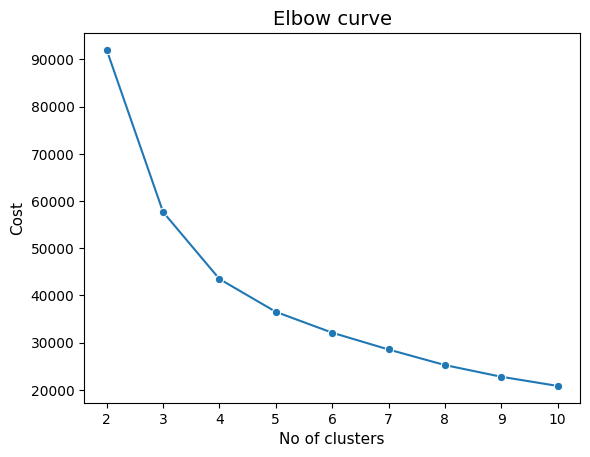

In [ ]:
num_clusters = list(range(2, 11))

cost_values = []

# calculate cost values for each number of clusters (2 to 10)
#verbose=0.2 more info about the clusters
#gamma 0 to 1 - higher more the numeric values will have influence than categoric and so the opposite
for k in num_clusters:
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
    kproto.fit_predict(df, categorical= categorical_indexes)
    cost_values.append(kproto.cost_)

# plot cost against number of clusters
ax = sns.lineplot(x=num_clusters, y=cost_values, marker="o")
ax.set_title('Elbow curve', fontsize=14)
ax.set_xlabel('No of clusters', fontsize=11)
ax.set_ylabel('Cost', fontsize=11)

In [ ]:
# Numero de clusters para 4
kproto = KPrototypes(n_clusters= 4, init='Huang', n_init = 15, random_state=42)
kproto.fit_predict(df, categorical= categorical_indexes)
clusters = kproto.fit_predict(df, categorical= categorical_indexes)


cluster_labels = kproto.labels_

df["cluster"] = cluster_labels

df.head()

,credit_score,country,gender,age,tenure(year),balance,products_number,credit_card,active_member,estimated_salary,cluster
0,0.524,Spain,Male,35,1,0.000000,1,1,1,0.416647,1
1,0.294,Germany,Male,41,5,0.321018,1,0,0,0.444040,0
2,0.532,Germany,Female,41,1,0.412759,1,1,0,0.001125,0
3,0.536,France,Female,37,5,0.385228,1,1,0,0.493877,0
4,0.460,Germany,Male,44,9,0.571511,1,0,0,0.735145,0


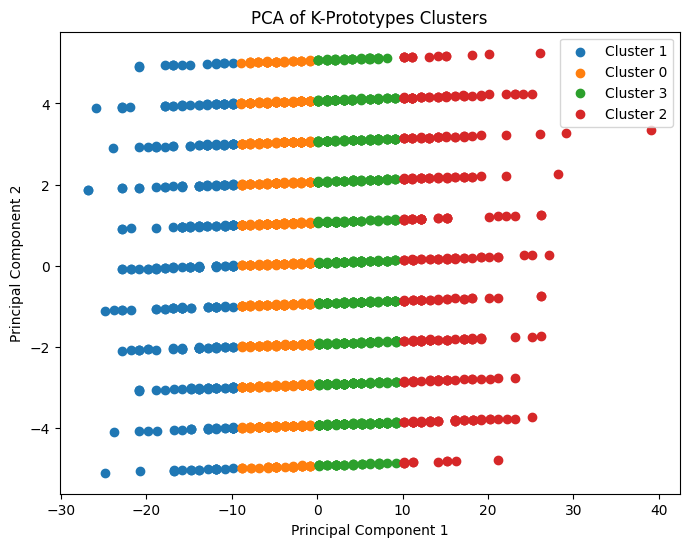

In [ ]:
#PCA-----------------------

# Considerando apenas as colunas numéricas para o PCA
numerical_data = df[numerical_columns]
# Aplicando PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(numerical_data)

# Criando um DataFrame para os componentes principais
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters

# Visualizando os clusters em 2D
plt.figure(figsize=(8, 6))
for cluster in pca_df['cluster'].unique():
    subset = pca_df[pca_df['cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}')

plt.title('PCA of K-Prototypes Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [ ]:
#3 pontos principais podem ser retirados dessa representação gráfico utilizando PCA para redução da dimensionalidade em 2 componentes (2d) utilizando as variaveis númericas como input
#há uma densidade maior entre o cluster 0 e cluster 3 (reforçando a utilização dos dois como ponto focal), os dados estão bem divididos e lineares e é possivel
# identificar uma progressão (como foi levantado antes a idade começando de 36~54, assim como o score crescente são itens que são representados nos dois clusters)
# já os demais clusters possuem uma variância entre os seus dados maior na identificação do cluster onde podemos identificar uma possibilidade de subgrupo em certos registros que estão mais próximos até dos dois clusters principais


In [ ]:
#revertendo os dados escalonados

# Lista das colunas que você deseja reverter o escalonamento
colunas_para_reverter = ['credit_score', 'balance', 'estimated_salary']

# Criar um novo DataFrame para armazenar os dados revertidos
dados_originais = df[colunas_para_reverter]

# Desfazendo o escalonamento para todas as colunas
dados_originais = scaler.inverse_transform(dados_originais)



In [ ]:
dados_retorno = pd.DataFrame(dados_originais,columns=colunas_para_reverter)

In [ ]:
df['credit_score_adj'] = dados_retorno['credit_score']
df['balance_adj'] = dados_retorno['balance']
df['estimated_salary_adj'] = dados_retorno['estimated_salary']

In [ ]:
df.drop(columns=colunas_para_reverter,inplace=True)
df

,country,gender,age,tenure(year),products_number,credit_card,active_member,cluster,credit_score_adj,balance_adj,estimated_salary_adj
0,Spain,Male,35,1,1,1,1,1,612.0,0.00,83256.26
1,Germany,Male,41,5,1,0,0,0,497.0,80542.81,88729.22
2,Germany,Female,41,1,1,1,0,0,616.0,103560.57,236.45
3,France,Female,37,5,1,1,0,0,618.0,96652.86,98686.40
4,Germany,Male,44,9,1,0,0,0,580.0,143391.07,146891.07
...,...,...,...,...,...,...,...,...,...,...,...
2032,Germany,Male,43,6,3,1,0,0,755.0,165048.50,16929.41
2033,France,Male,50,9,4,1,0,3,644.0,76817.00,196371.13
2034,Germany,Male,40,2,3,0,0,0,670.0,164948.98,177028.00
2035,France,Male,63,2,2,1,1,2,640.0,68432.45,112503.24


In [ ]:
df.to_excel('Cluster_Kprototype.xlsx',index=False)

In [ ]:
# tamanho de cada cluster

df["cluster"].value_counts()

,count
cluster,
3,702
0,646
1,347
2,342


In [ ]:
# tamanho em % de cada cluster

(df["cluster"].value_counts() / df['cluster'].count())*100

,count
cluster,
3,34.462445
0,31.713304
1,17.034855
2,16.789396
